In [1]:
#Basic SEIR Model: 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [11]:
N = 164467959

df = pd.read_csv("BD_CVdata.csv", header = 0) # dataset

df = df.iloc[26:,:]
df.shape
df.tail()

,Date,Confirmed,Recovered,Daily_Confirmed,Deaths,Daily_Deaths,Total_Test,Number_of_daily_test,time
66,12-05-20,16660,3147,969,250,11,136638,6773.0,67
67,13-05-20,17822,3361,1162,269,19,144538,7900.0,68
68,14-05-20,18863,3361,1041,283,14,151930,7392.0,69
69,15-05-20,20065,3882,1202,298,15,160512,8582.0,70
70,16-05-20,20995,4117,930,314,16,167294,6782.0,71


In [4]:
start_date = df['Date'].iloc[0]
confirmed = df['Confirmed'].values.tolist()
recovered = df['Recovered'].values.tolist()
deaths = df['Deaths'].values.tolist()
test = df['Number_of_daily_test'].values.tolist()
tt = df['Total_Test'].values.tolist()

infected = [ c - r - d for (c, r, d) in zip(confirmed, recovered, deaths)]

In [ ]:
I = infected[-1]
R = recovered[-1]
D = deaths [-1]

SE = N - I - R - D

E = int(SE * .1)

S = SE - E

In [69]:
t_max = 50 #Maximum time, in days
dt = .1 #time steps, in days

#create time datapoints for our calculation
t = np.linspace(0, t_max, int(t_max/dt) + 1) 

I = infected[-1]
R = recovered[-1]
D = deaths [-1]

SE = N - I - R - D

E = int(SE * .1)

S = SE - E
init_vals =S  ,E,I,R,D


alpha = 0.11712301036017933  

beta = 0.047312686058343836

gamma = 0.014793830657853321

delta = 0.0010072395341517155

params = 0.11712301036017933, 0.047312686058343836, 0.014793830657853321, 0.0010072395341517155

In [70]:
def seird_model_wsd(init_vals, params, t,rho):

    S_0, E_0, I_0, R_0, D_0 = init_vals
    S, E, I, R, D = [S_0], [E_0], [I_0], [R_0], [D_0]
    alpha, beta, gamma, delta = params
    dt = t[1] - t[0]
    for _ in t[1:]:

        next_S = S[-1] - ( rho*beta * (S[-1] / N) * I[-1] )  # Susceptible
        next_E = E[-1] + ( rho*beta * (S[-1] / N) * I[-1] ) - ( alpha * E[-1] ) # Exposed
        next_I = I[-1] + ( alpha * E[-1] ) - ( gamma * I[-1] ) - ( delta * I[-1] ) # Infected
        next_R = R[-1] + ( gamma * I[-1] ) # Recovered
        next_D = D[-1] + ( delta * I[-1] ) # Deaths
        
        S.append(next_S)
        E.append(next_E)
        I.append(next_I)
        R.append(next_R)
        D.append(next_D)
        
    return S, E, I, R, D, t

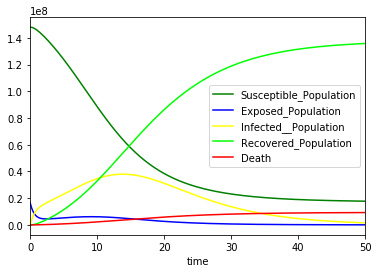

In [73]:
# Run the claculation
results = seird_model_wsd(init_vals, params, t, 0.8)
# Plot results
S, E, I, R, D, t = results

ff = pd.DataFrame() 
ff['time'] = t
ff['Susceptible_Population'] = S
ff['Exposed_Population'] = E
ff['Infected__Population'] = I
ff['Recovered_Population'] = R
ff['Death'] = D

ff.plot('time', y=['Susceptible_Population', 'Exposed_Population', 'Infected__Population', 'Recovered_Population','Death' ], 
    color=['green', 'blue', 'yellow', 'lime', 'red'])
plt.show()

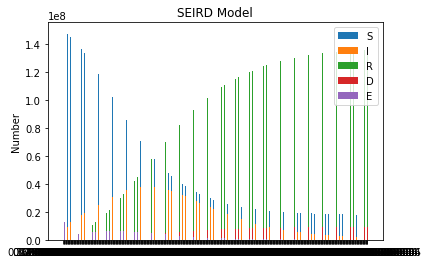

In [79]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


labels = t
Susceptible_Population = S
Exposed_Population = E
Infected__Population = I
Recovered_Population= R
Death = D

x = np.arange(len(labels))  # the label locations
width = 0.1  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, Susceptible_Population, width, label='S')
rects3 = ax.bar(x - width/2, Infected__Population, width, label='I')
rects4 = ax.bar(x + width/2, Recovered_Population, width, label='R')

rects5 = ax.bar(x + width/2, Death, width, label='D')

rects2 = ax.bar(x + width/2, Exposed_Population, width, label='E')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number')
ax.set_title('SEIRD Model')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()
